<a href="https://colab.research.google.com/github/Arathi1996-P/ML-and-DEEP-LEARNING/blob/main/California_housing_data_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df1=df.dropna(subset=["total_bedrooms"])

In [ ]:
df1.shape

(20433, 10)

Lets drop all the 207 null values in the column total_bedrooms and proceed.

In [ ]:
df1.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Cleaned the dataset and filled all null values.

Now next step is to replace all the terms or words in our dataset with bnumbers since machine laeraning cannot handle datas in the orm o terms or words.

In [ ]:
df1["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

Got the description of our categorical variable.

In [ ]:
df1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Got the complete information of the dataset.

**MAKE A HIST PLOT**

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

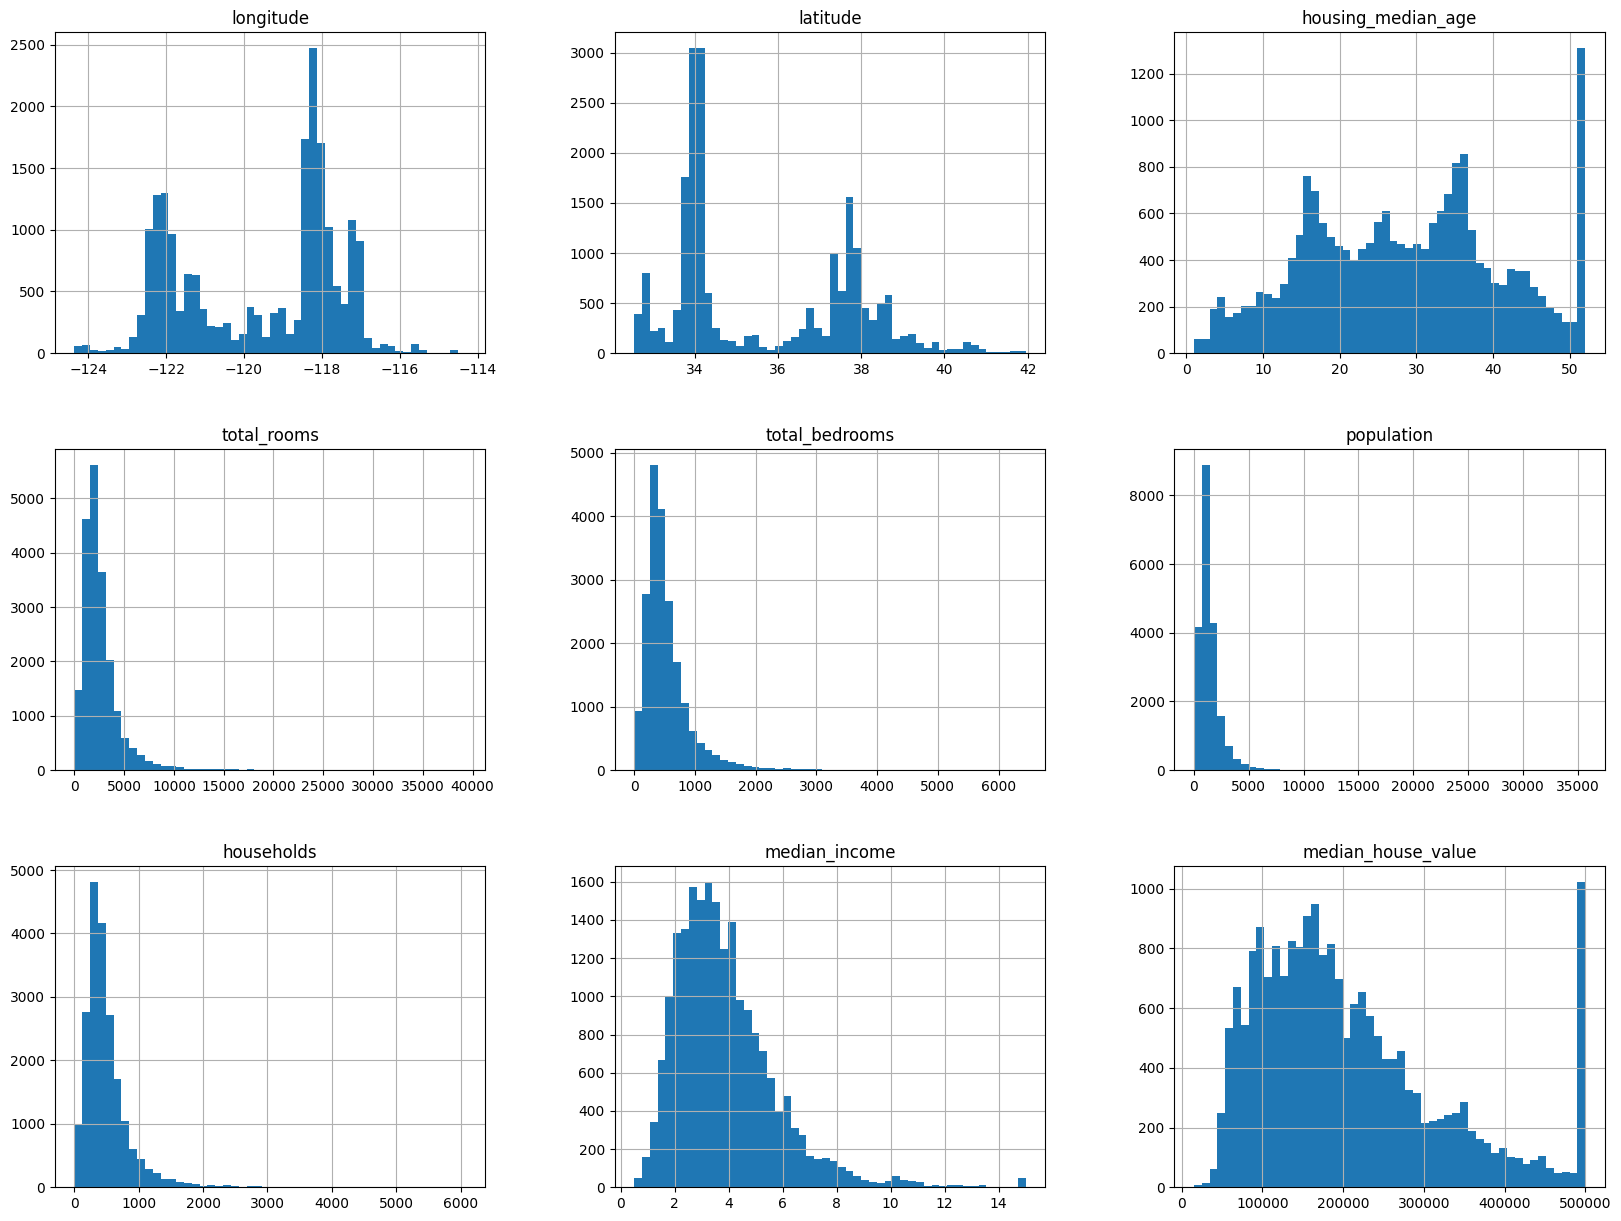

In [ ]:
df1.hist(bins=50,figsize=(20,15))

Got the complete pattern of distribution of all the parametrs in the dataset.

**Make the scatter plot**

<Axes: xlabel='longitude', ylabel='latitude'>

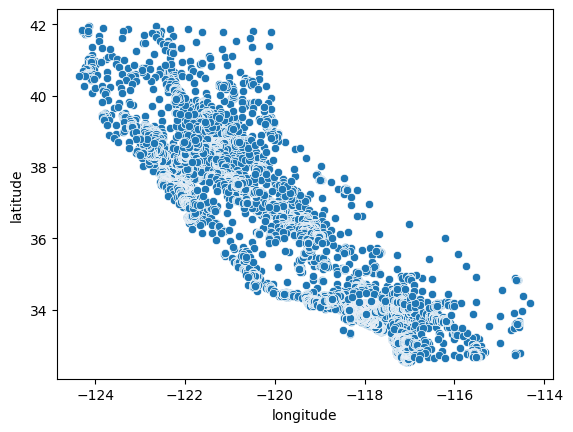

In [ ]:
sns.scatterplot(data=df,x='longitude',y='latitude')

The map actually looks like the maps of california, where each and every dots represent districts.

<Axes: xlabel='latitude', ylabel='longitude'>

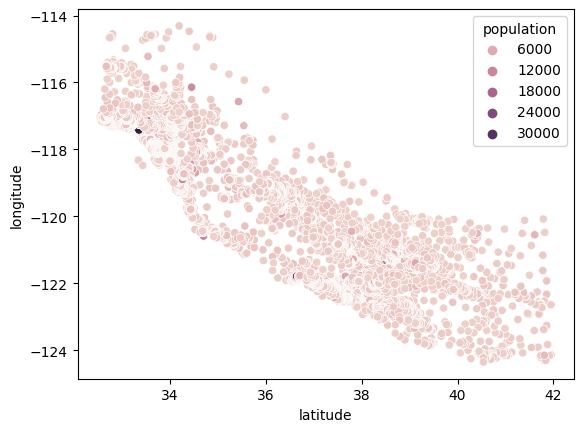

In [ ]:
sns.scatterplot(data=df1,x='latitude',y='longitude',hue='population')

Here from this scatter plot where we could find the realtion between the various districts and their poputation.

<Axes: xlabel='total_bedrooms', ylabel='total_rooms'>

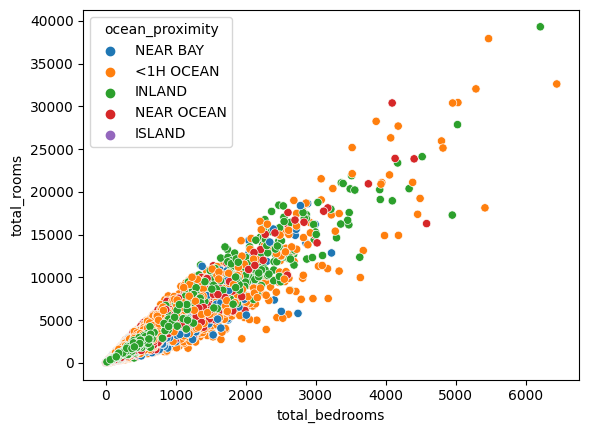

In [ ]:
sns.scatterplot(data=df1,x='total_bedrooms',y='total_rooms',hue='ocean_proximity')

<Axes: xlabel='latitude', ylabel='longitude'>

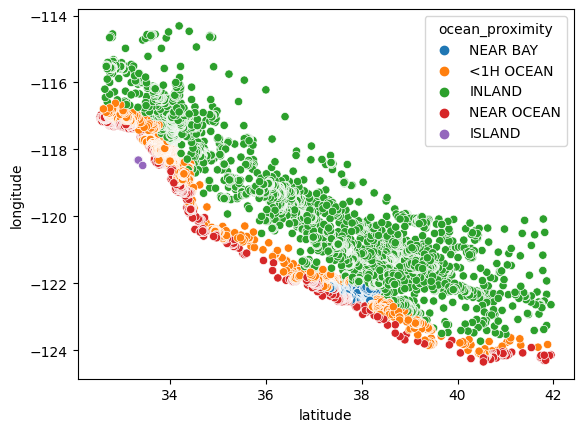

In [ ]:
sns.scatterplot(data=df1,x='latitude',y='longitude',hue='ocean_proximity')

Here from this scatter plot we can say that we can easly divide the dat in to various clases based on this distributio with respect to ocean_proximity. Which shows that logistic regressio is suitable for this particular dataset.Evn though there are some kind of overlaping.we can predict which one belongs to which class using logistic regression.

**Now we have to map the ocean_proximity column in to numbers since ML cannot read the datas in the form of terms/charcters. So we can simply map various categories in the parameter ocean_proximity into different numbers.**

In [ ]:
dataMapping={"<1H OCEAN":0,
             "INLAND":1,
             "ISLAND":2,
             "NEAR BAY":3,
             "NEAR OCEAN":4

}
df1['ocean_proximity_number']=df['ocean_proximity'].map(dataMapping)
df1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_number
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,1


In [ ]:
df2=df1.drop(['ocean_proximity'],axis=1)
df2


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_number
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


**Preparing inputs and outputs**

In [ ]:
target=df2.ocean_proximity_number
inputs=df2.drop('ocean_proximity_number',axis=1)

**Split the dataset to train the model**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

**Create logistic regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

We have built the logistic regression model with the help of logistic regression algorithm.

**To check the accuracy**

In [ ]:
model.score(x_train,y_train)

0.5149883763611893

**Make predictions**

In [ ]:
expected = y_test
predicted = model.predict(x_test)
predicted

array([0, 0, 0, ..., 0, 0, 1])

**Summarize the predictions of the model**

In [ ]:
from sklearn import metrics
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       0.49      0.95      0.64      1821
           1       0.71      0.30      0.42      1272
           3       0.00      0.00      0.00       454
           4       0.00      0.00      0.00       540

    accuracy                           0.52      4087
   macro avg       0.30      0.31      0.27      4087
weighted avg       0.44      0.52      0.42      4087



From the summary of the model we can find the model only have an accuracy of 52%.But we should not be surprised because we have alrday got to know rom the scatter plot that there are a lot more number of collisions .

**Confusion matrix**

In [ ]:
ir=metrics.confusion_matrix(expected,predicted)
ir

array([[1732,   89,    0,    0],
       [ 894,  378,    0,    0],
       [ 432,   22,    0,    0],
       [ 500,   40,    0,    0]])

Text(33.22222222222222, 0.5, 'actual value')

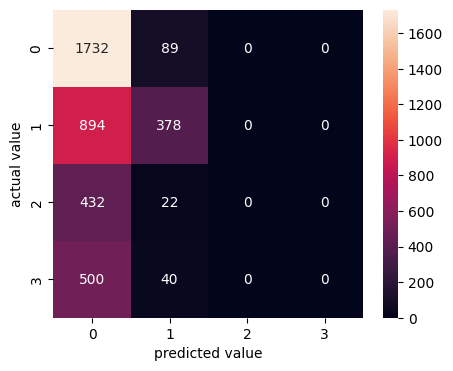

In [ ]:
plt.figure(figsize =(5,4))
sns.heatmap(ir,annot=True,fmt='000')
plt.xlabel('predicted value')
plt.ylabel('actual value')

From heat map also we can clearly analyse the rate of accuracy for all specific classes under the parameter ocean_proximity.we can only make comparotively better predictions for <1H OCEAN. For others the accuracy rate for the predictions will be comparitively low.